<a href="https://colab.research.google.com/github/Jaagat-P/BioFSDatasets_and_code/blob/master/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import os
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.0.0+cu118


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html


In [ ]:
!pip install networkx
!pip install matplotlib
!pip install torch
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.9.0+${CUDA}.html
!pip install torch-geometric
!pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+.html
Looking in indexes: https:/

In [ ]:
!# Visualization
import networkx as nx
import matplotlib.pyplot as plt
# Imports
import torch
import torch_geometric
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.loader import DataLoader
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import negative_sampling
from tqdm import trange

OSError: ignored

In [ ]:
import pandas as pd
import numpy as np 

df = pd.read_csv("/content/genemania-interactions (3) (1).txt", sep="\t")
df.head(50)

,Gene 1,Gene 2,Weight,Network group,Network
0,MACROH2A1,EZH2,0.008511,Co-expression,Wang-Maris-2006
1,E2F3,E2F2,0.007032,Co-expression,Wang-Maris-2006
2,OIP5,MACROH2A1,0.005793,Co-expression,Wang-Maris-2006
3,DNMT1,EZH2,0.005764,Co-expression,Wang-Maris-2006
4,DNMT1,MACROH2A1,0.006159,Co-expression,Wang-Maris-2006
5,DNMT1,E2F3,0.004438,Co-expression,Wang-Maris-2006
6,DNMT1,OIP5,0.004135,Co-expression,Wang-Maris-2006
7,EZH1,PHF1,0.009672,Co-expression,Mallon-McKay-2013
8,SMS,RBBP7,0.020063,Co-expression,Mallon-McKay-2013
9,JARID2,AEBP2,0.009042,Co-expression,Mallon-McKay-2013


In [ ]:
#drop last column of dataframe

df = df.drop(columns=["Network"], axis=1)


df.head(50)

,Gene 1,Gene 2,Weight,Network group
0,MACROH2A1,EZH2,0.008511,Co-expression
1,E2F3,E2F2,0.007032,Co-expression
2,OIP5,MACROH2A1,0.005793,Co-expression
3,DNMT1,EZH2,0.005764,Co-expression
4,DNMT1,MACROH2A1,0.006159,Co-expression
5,DNMT1,E2F3,0.004438,Co-expression
6,DNMT1,OIP5,0.004135,Co-expression
7,EZH1,PHF1,0.009672,Co-expression
8,SMS,RBBP7,0.020063,Co-expression
9,JARID2,AEBP2,0.009042,Co-expression


In [ ]:
df.shape

(529, 4)

MACROH2A1 EZH2 Co-expression
E2F3 E2F2 Co-expression
OIP5 MACROH2A1 Co-expression
DNMT1 EZH2 Co-expression
DNMT1 MACROH2A1 Co-expression
DNMT1 E2F3 Co-expression
DNMT1 OIP5 Co-expression
EZH1 PHF1 Co-expression
SMS RBBP7 Co-expression
JARID2 AEBP2 Co-expression
DNMT1 EZH2 Co-expression
YY1 EED Co-expression
RBBP4 EED Co-expression
JARID2 EZH2 Co-expression
OIP5 EZH2 Co-expression
DNMT1 EZH2 Co-expression
DNMT1 SUZ12 Co-expression
DNMT1 JARID2 Co-expression
RBBP7 SUZ12 Co-expression
RBBP7 EED Co-expression
SMS RBBP7 Co-expression
JARID2 EZH1 Co-expression
DNMT1 EZH2 Co-expression
MACROH2A1 EZH2 Co-expression
E2F3 EZH2 Co-expression
E2F3 MACROH2A1 Co-expression
EZH1 SETMAR Co-expression
E2F1 PHF19 Co-expression
OIP5 E2F1 Co-expression
CDKN2C OIP5 Co-expression
DNMT1 E2F1 Co-expression
CDKN2C E2F1 Co-expression
CDKN2C DNMT1 Co-expression
MACROH2A1 SUZ12 Co-expression
RBBP4 MACROH2A1 Co-expression
SMS EZH2 Co-expression
JARID2 PRAME Co-expression
OIP5 RBBP4 Co-expression
DNMT1 EZH2 Co-expr

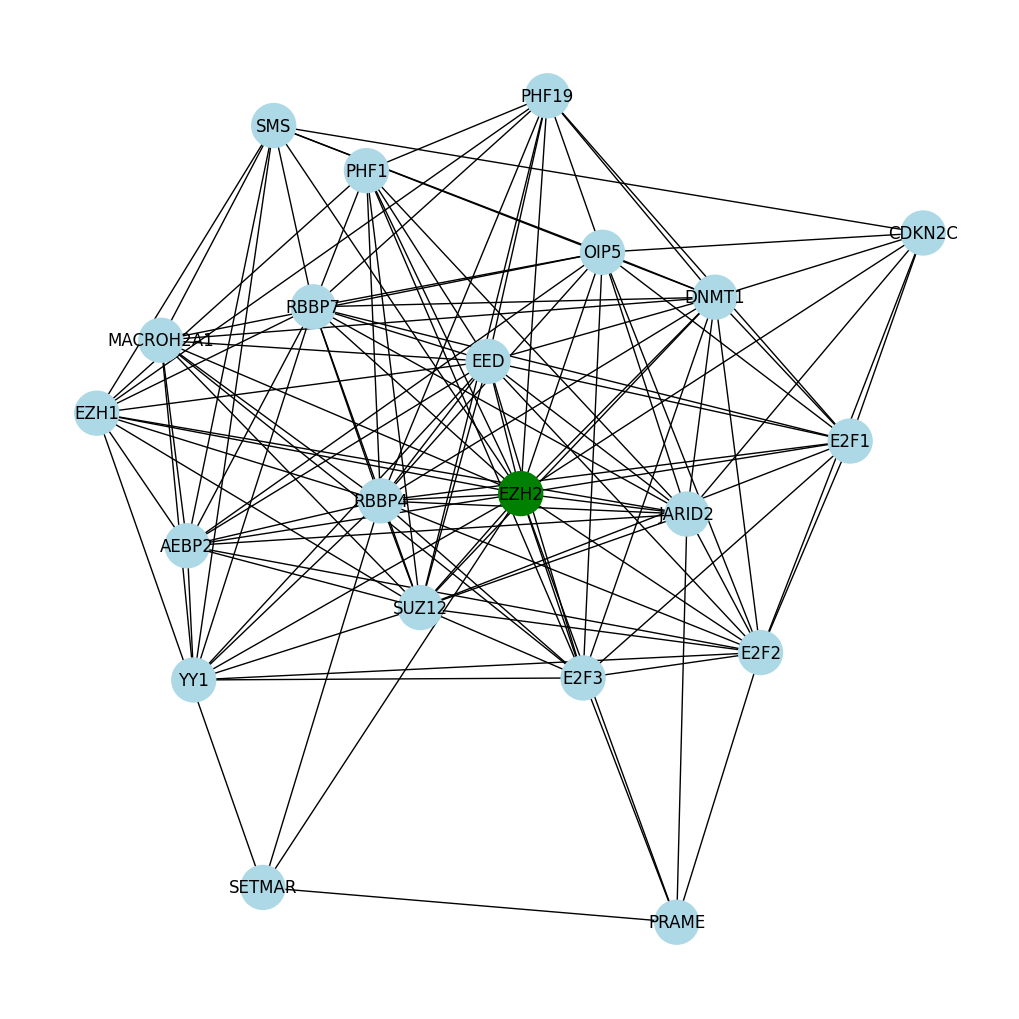

In [ ]:
import networkx as nx

graph = nx.Graph()

for index, row in df.iterrows():
    Gene_1 = row['Gene 1']
    Gene_2 = row['Gene 2']
    Weight = row['Weight']
    Network_Group = row['Network group']

    graph.add_edge(Gene_1, Gene_2, Weight=Weight)
    
    if "network_group" not in graph.nodes[Gene_1]:
        graph.nodes[Gene_1]["network_group"] = Network_Group
    if "network_group" not in graph.nodes[Gene_2]:
        graph.nodes[Gene_2]["network_group"] = Network_Group

    print(Gene_1, Gene_2, Network_Group)


# visualize the graph
plt.figure(figsize=(10,10))

node_colors = ['lightblue' if node != 'EZH2' else 'green' for node in graph.nodes]
nx.draw(graph, with_labels=True, node_size=1000, node_color=node_colors, pos=nx.kamada_kawai_layout(graph))

plt.show()




The longest distance between any node and EZH2 is:  0.017008203100000004


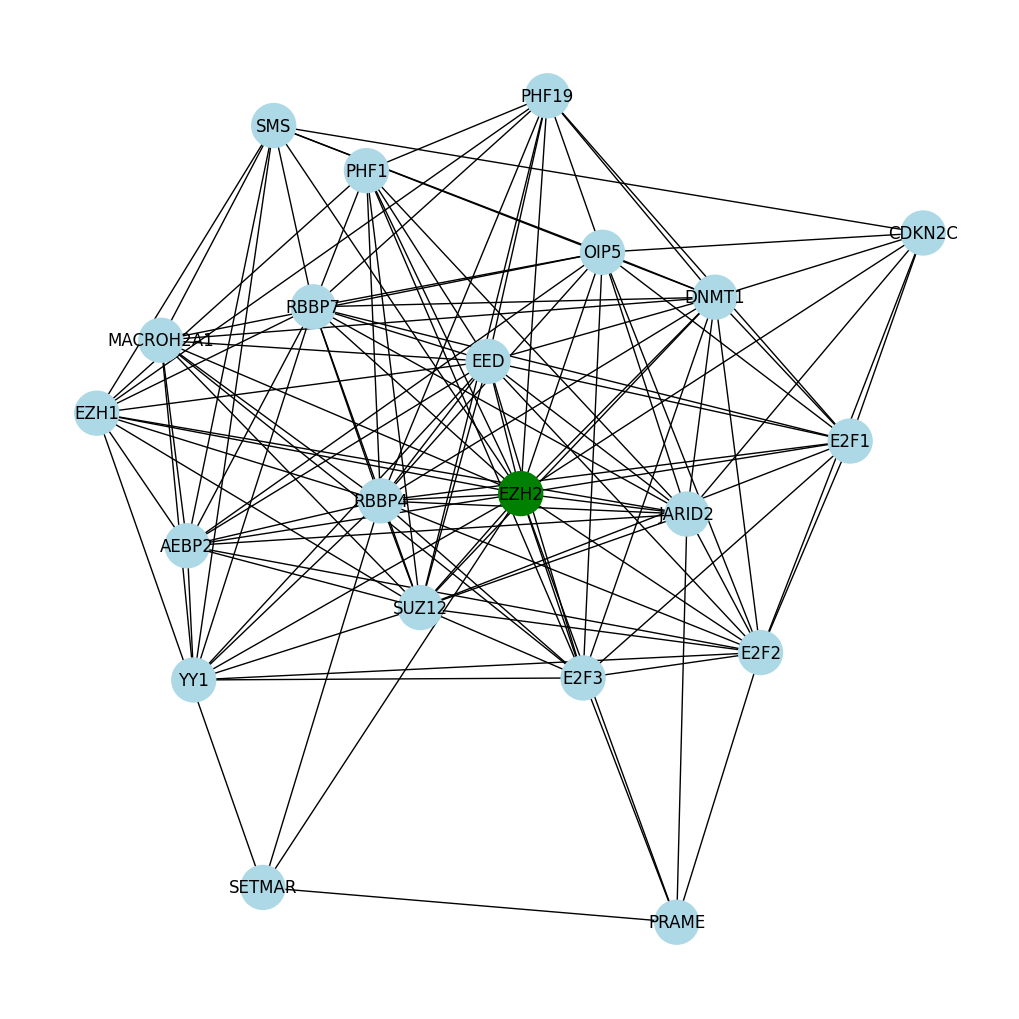

In [ ]:
from queue import PriorityQueue
import heapq

# get the longest distance between any node and EZH2

def dijkstra(graph, start, end):
    distances = {node: float("inf") for node in graph.nodes}
    distances[start] = 0
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_node == end:
            return distances[end]
        
        for neighbor, weight in graph[current_node].items():
            new_distance = current_distance + weight['Weight']
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(queue, (new_distance, neighbor))

    return float("inf")

longest_distance = 0
for node in graph.nodes:
    if node != "EZH2":
        distance = dijkstra(graph, node, "EZH2")
        longest_distance = max(longest_distance, distance)

print("The longest distance between any node and EZH2 is: ", longest_distance)

# visualize the graph
plt.figure(figsize=(10,10))

node_colors = ['lightblue' if node != 'EZH2' else 'green' for node in graph.nodes]
nx.draw(graph, with_labels=True, node_size=1000, node_color=node_colors, pos=nx.kamada_kawai_layout(graph))

plt.show()


In [ ]:
avg_clustering = nx.average_clustering(graph)
print(avg_clustering)

0.7004975739938145


In [ ]:
degree = graph.degree("EZH2")
print("Degree of EZH2:", degree)


Degree of EZH2: 20


In [ ]:
new_df = df.iloc[:, :2]
#combine first two columns of dataset, Gene 1 and Gene 2 and identify unique values

combined = pd.concat([new_df["Gene 1"], new_df["Gene 2"]])
unique_values = combined.unique()
print(unique_values)


['MACROH2A1' 'E2F3' 'OIP5' 'DNMT1' 'EZH1' 'SMS' 'JARID2' 'YY1' 'RBBP4'
 'RBBP7' 'E2F1' 'CDKN2C' 'SUZ12' 'PRAME' 'SETMAR' 'PHF19' 'E2F2' 'EED'
 'AEBP2' 'PHF1' 'EZH2']


In [ ]:
graph.number_of_edges()

122

In [ ]:
#Creat a new df of just gene interactions where the first two columsn represent interactions solely in terms of the HGNC ID
  
data = [['EZH2', 3527], ['SUZ12', 17101], ['EED', 3188], ['PHF1', 8919], ['MACROH2A1', 4740], ['E2F2', 3114], ['E2F3', 3115], ['AEBP2', 24051], ['PRAME', 9336], ['RBBP7', 9890], ['YY1',12856], ['SETMAR', 10762], ['RBBP4', 9887], ['EZH1', 3526], ['SMS', 11123], ['JARID2', 6196], ['PHF19', 24566], ['E2F1', 3113], ['OIP5', 20300], ['DNMT1', 2976], ['CDKN2C', 1789],['XRCC2',12829], ['MSH6', 7329], ['MSH2', 7325], ['MRE11A', 7230], ['EZH2', 3527], ['PCNA', 8729], ['FEN1', 3650], ['RAD51C', 9820], ['RAD51D', 9823], ['MSH3', 7326], ['EXO1', 3511], [ 'RAD51', 9817], ['LIG1', 6598], ['CCDC150', 26834], ['PMS1', 9121], ['RAD51AP1', 16956], ['MUTYH', 7527], ['E2F3', 3115], ['MLH1', 7127], ['PMS2', 9122], ['NBN', 7652], ['CFAP161', 26782], ['DMC1', 2927], ['MLH3', 7128], ['MSH4', 7327], ['RAD51AP2', 34417], ['RAD50', 9816], ['MSH5', 7328], ['TRMT61A', 23790], ['ACACA', 84], ['RAD54B', 17228], ['XRCC3', 12830]] 

# Create the pandas DataFrame
dfo = pd.DataFrame(data, columns=['Gene', 'ID'])

print(dfo)
  

         Gene     ID
0        EZH2   3527
1       SUZ12  17101
2         EED   3188
3        PHF1   8919
4   MACROH2A1   4740
5        E2F2   3114
6        E2F3   3115
7       AEBP2  24051
8       PRAME   9336
9       RBBP7   9890
10        YY1  12856
11     SETMAR  10762
12      RBBP4   9887
13       EZH1   3526
14        SMS  11123
15     JARID2   6196
16      PHF19  24566
17       E2F1   3113
18       OIP5  20300
19      DNMT1   2976
20     CDKN2C   1789
21      XRCC2  12829
22       MSH6   7329
23       MSH2   7325
24     MRE11A   7230
25       EZH2   3527
26       PCNA   8729
27       FEN1   3650
28     RAD51C   9820
29     RAD51D   9823
30       MSH3   7326
31       EXO1   3511
32      RAD51   9817
33       LIG1   6598
34    CCDC150  26834
35       PMS1   9121
36   RAD51AP1  16956
37      MUTYH   7527
38       E2F3   3115
39       MLH1   7127
40       PMS2   9122
41        NBN   7652
42    CFAP161  26782
43       DMC1   2927
44       MLH3   7128
45       MSH4   7327
46   RAD51AP2

In [ ]:
#Replace gene names with gene IDs



#Convert gene 1 and gene 2 into lists

gene1list = df.iloc[:,0].tolist()
gene2list = df.iloc[:,1].tolist()

import pandas as pd

# initialize the ID list
ID_list = []

# loop through each gene in gene_list
for gene in gene1list:
    # check if the gene exists in the Gene column of the dataframe
    if gene in dfo['Gene'].values:
        # get the corresponding ID
        ID = dfo.loc[dfo['Gene'] == gene, 'ID'].iloc[0]
        # add the ID to the ID list
        ID_list.append(ID)
    else:
        # add None if the gene does not exist in the dataframe
        ID_list.append(None)

# replace the genes in gene_list with the IDs from the ID list
gene1list = ID_list

IDu_list = []


for gene in gene2list:
    # check if the gene exists in the Gene column of the dataframe
    if gene in dfo['Gene'].values:
        # get the corresponding ID
        ID = dfo.loc[dfo['Gene'] == gene, 'ID'].iloc[0]
        # add the ID to the ID list
        IDu_list.append(ID)
    else:
        # add None if the gene does not exist in the dataframe
        IDu_list.append(None)

# replace the genes in gene_list with the IDs from the ID list
gene2list = IDu_list



#We are essentially replacing all of the genes in the Gene 1 and Gene 2 column of df with their respective HGNC IDs

In [ ]:
len(gene1list)

529

In [ ]:
n = df.shape[0]
print("Number of values in the first column of the dataframe:", n)

Number of values in the first column of the dataframe: 529


In [ ]:
#replace columns with updated Id lists, gene1list and gene2list

df['Gene 1'] = gene1list
df['Gene 2'] = gene2list

In [ ]:
df.head(100)

,Gene 1,Gene 2,Weight,Network group
0,4740,3527,0.008511,Co-expression
1,3115,3114,0.007032,Co-expression
2,20300,4740,0.005793,Co-expression
3,2976,3527,0.005764,Co-expression
4,2976,4740,0.006159,Co-expression
...,...,...,...,...
95,3114,3188,0.189241,Genetic Interactions
96,3115,3527,0.128868,Genetic Interactions
97,3115,3188,0.154558,Genetic Interactions
98,3113,3527,0.054471,Genetic Interactions


In [ ]:
#one hot encode network group 

#predict the network group based upon two given inputted nodes and weight 
#don't one hot encode weight - it's continouus 
# only one hot encode categorical variables

In [ ]:
import random

def split_edges(G, ratio):
    positive_edges = [(u, v, 1) for (u, v, d) in G.edges(data=True) if d['Weight'] >= threshold]
    negative_edges = [(u, v, 0) for (u, v, d) in G.edges(data=True) if d['Weight'] < threshold]
    edges = positive_edges + negative_edges
    random.shuffle(edges)
    split = int(ratio * len(edges))
    training_edges = edges[:split]
    testing_edges = edges[split:]
    return training_edges, testing_edges, positive_edges, negative_edges

threshold = 0.02 # value for determining positive and negative edges based on the Weight attribute
ratio = 0.8 # 80% of the edges for training, 20% for testing
training_edges, testing_edges, positive_edges, negative_edges = split_edges(graph, ratio)

# Convert nodes in the edge tuples to their indices
node_to_index = {node: index for index, node in enumerate(graph.nodes())}
training_edges = [(node_to_index[u], node_to_index[v]) for u, v, d in training_edges]
testing_edges = [(node_to_index[u], node_to_index[v]) for u, v, d in testing_edges]

# Convert the edge lists to tensors
training_edges = torch.tensor(training_edges, dtype=torch.long)
testing_edges = torch.tensor(testing_edges, dtype=torch.long)




In [ ]:
len(negative_edges)

60

In [ ]:
training_edges

tensor([[ 1, 16],
        [ 0,  1],
        [11, 14],
        [14, 15],
        [ 1,  4],
        [ 6, 13],
        [ 7, 13],
        [ 0, 15],
        [ 0, 11],
        [10, 15],
        [ 3, 19],
        [10, 11],
        [ 4,  9],
        [ 6, 16],
        [ 7, 15],
        [13, 14],
        [ 5, 15],
        [ 4, 14],
        [ 2, 17],
        [14, 18],
        [ 4, 10],
        [ 2,  3],
        [17, 18],
        [13, 17],
        [ 3, 13],
        [ 1,  3],
        [ 9, 15],
        [ 2,  7],
        [ 4, 18],
        [ 9, 14],
        [ 9, 11],
        [ 7, 14],
        [11, 12],
        [ 3, 17],
        [ 9, 10],
        [ 9, 17],
        [ 6, 15],
        [ 8,  9],
        [ 0,  8],
        [ 5, 17],
        [ 7, 18],
        [14, 17],
        [12, 15],
        [14, 16],
        [ 2, 15],
        [ 3,  4],
        [10, 13],
        [ 9, 13],
        [ 5,  8],
        [11, 13],
        [ 1, 17],
        [ 3,  5],
        [ 1,  6],
        [ 4,  8],
        [15, 17],
        [ 

In [ ]:
len(testing_edges)

25

In [ ]:
node_to_index = {node: i for i, node in enumerate(graph.nodes)}
edge_list = [(node_to_index[edge[0]], node_to_index[edge[1]]) for edge in graph.edges]
edge_list = torch.tensor(edge_list).t().contiguous()
edge_index = edge_list

print(edge_list)
#transposed? study. 

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
          4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,
          9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12,
         12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 17, 17],
        [ 1,  4,  5,  2, 15, 14, 12,  8, 11, 13,  5, 10,  4,  2,  8, 15, 18, 14,
         17,  3, 13,  9, 12,  7, 11,  6, 19, 20, 16,  3,  5,  4, 20,  7, 17, 13,
         14, 12, 15, 20, 17, 13, 19, 11, 10,  4, 14,  5, 12, 15,  5, 17, 19, 14,
         18, 11,  8, 10,  9, 15, 10, 17, 19,  8, 14, 18, 13,  9,  7, 10, 16, 13,
         11,  8, 15, 18,  9, 14, 10, 15, 13,  9, 14, 18,  9, 19, 11, 12, 15, 13,
         11, 12, 14, 17, 10, 18, 11, 20, 13

In [ ]:
df.head()

,Gene 1,Gene 2,Weight,Network group
0,4740,3527,0.008511,Co-expression
1,3115,3114,0.007032,Co-expression
2,20300,4740,0.005793,Co-expression
3,2976,3527,0.005764,Co-expression
4,2976,4740,0.006159,Co-expression


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# Prepare the training and testing data
x = df[["Gene 1", "Gene 2"]].values 
y = df["Weight"].values
np.set_printoptions(precision=6, suppress=True)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Convert the data to PyTorch tensors
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)



In [ ]:
print("Length of x_train ", len(x_train))
print("Length of y_train", len(y_train))
print("Length of x_test", len(x_test))
print("Length of y_test", len(y_test))

Length of x_train  423
Length of y_train 423
Length of x_test 106
Length of y_test 106


In [ ]:
df.shape

(529, 4)

In [ ]:
print(x)

[[ 4740  3527]
 [ 3115  3114]
 [20300  4740]
 ...
 [24566  8919]
 [ 3113  3114]
 [ 3113  3115]]


In [ ]:
print(y)

[0.008511 0.007032 0.005793 0.005764 0.006159 0.004438 0.004135 0.009672
 0.020063 0.009042 0.010445 0.006834 0.007742 0.008121 0.004602 0.005617
 0.014926 0.01266  0.006764 0.013674 0.010445 0.015141 0.008465 0.018817
 0.021048 0.01644  0.010416 0.017459 0.008354 0.007472 0.005495 0.006453
 0.006969 0.014077 0.015338 0.004894 0.01602  0.007182 0.00409  0.005814
 0.00459  0.005949 0.017813 0.014002 0.008426 0.009269 0.007726 0.017731
 0.005937 0.01832  0.0037   0.006864 0.006782 0.008689 0.004618 0.005976
 0.012799 0.005976 0.015087 0.009022 0.006449 0.008293 0.004748 0.005282
 0.0091   0.007472 0.009484 0.009909 0.017096 0.00415  0.01889  0.00515
 0.010961 0.006638 0.003269 0.004821 0.006718 0.00996  0.016169 0.014522
 0.016114 0.009087 0.005678 0.006558 0.002959 0.001948 0.005811 0.017466
 0.005186 0.00821  0.007519 0.007821 0.00762  1.       0.157785 0.189241
 0.128868 0.154558 0.054471 0.010272 0.362435 0.038208 0.002542 0.000434
 0.000421 0.000576 0.000948 0.000389 0.000389 0.0013

In [ ]:
print(x_train)

[[ 3114.  3527.]
 [24566. 17101.]
 [ 6196. 24051.]
 [ 3188. 17101.]
 [ 8919.  3527.]
 [ 3113.  3115.]
 [ 2976.  3113.]
 [ 3113.  3115.]
 [20300.  3527.]
 [ 3526. 24051.]
 [ 3526. 10762.]
 [ 3113.  9887.]
 [ 3115.  3188.]
 [17101.  3527.]
 [ 8919.  3527.]
 [ 4740.  3188.]
 [ 9887. 17101.]
 [ 3188.  3527.]
 [ 9890.  3527.]
 [24051.  3527.]
 [12856.  3188.]
 [ 9890.  3188.]
 [ 3113.  3527.]
 [ 6196.  3527.]
 [ 3113.  3114.]
 [ 2976.  3527.]
 [ 6196. 24051.]
 [24566.  8919.]
 [ 9887.  3188.]
 [24051.  3527.]
 [ 3115. 17101.]
 [ 6196.  9890.]
 [24051.  3527.]
 [ 3526.  8919.]
 [ 2976.  4740.]
 [ 9887.  3188.]
 [24051. 17101.]
 [12856.  4740.]
 [ 3526. 10762.]
 [ 3526.  9890.]
 [ 9336.  3114.]
 [ 3113.  3114.]
 [ 6196.  9887.]
 [ 3115.  3527.]
 [ 4740.  3527.]
 [ 3188. 17101.]
 [24566.  9887.]
 [ 2976.  3527.]
 [12856.  3527.]
 [ 6196.  3188.]
 [ 9890.  3527.]
 [ 9890.  8919.]
 [ 3113.  9887.]
 [ 2976.  3114.]
 [ 6196.  3527.]
 [ 3115.  3527.]
 [ 6196.  3188.]
 [12856.  3114.]
 [ 8919. 17101

In [ ]:
print(x_test)

[[ 3115.  8919.]
 [ 3115.  4740.]
 [10762.  3527.]
 [24051.  3527.]
 [ 3114. 17101.]
 [ 9890.  3527.]
 [24566. 17101.]
 [ 3188.  3527.]
 [12856.  3188.]
 [ 6196. 17101.]
 [ 6196.  3527.]
 [ 9890. 24051.]
 [ 2976.  3527.]
 [24051.  3527.]
 [ 2976.  3188.]
 [ 3526.  3527.]
 [ 2976.  3527.]
 [ 9336.  3527.]
 [ 3115.  3114.]
 [ 9890.  3527.]
 [ 2976.  3115.]
 [ 2976.  3527.]
 [ 9890.  3527.]
 [ 3113.  3115.]
 [ 1789.  3527.]
 [ 2976.  3115.]
 [ 9887. 24051.]
 [ 9887.  3527.]
 [20300. 11123.]
 [ 9890. 17101.]
 [24051.  3188.]
 [ 3526. 17101.]
 [ 3113.  9890.]
 [ 2976.  3527.]
 [ 1789.  2976.]
 [ 6196. 24051.]
 [24566.  9890.]
 [ 9887.  3115.]
 [ 9890. 24051.]
 [ 9887.  3188.]
 [ 4740.  3527.]
 [ 9890. 17101.]
 [ 9890. 17101.]
 [ 3113.  3114.]
 [10762.  3527.]
 [24566.  3527.]
 [ 6196. 17101.]
 [ 9890.  3527.]
 [24566. 17101.]
 [11123.  9890.]
 [20300. 24566.]
 [24051.  3188.]
 [ 9890.  3188.]
 [ 3114.  3527.]
 [ 9887.  9890.]
 [ 3526.  3527.]
 [ 6196. 24051.]
 [ 3113.  3188.]
 [ 3115.  3527

In [ ]:
print(y_train)

[0.034467 0.071003 0.047173 0.140935 0.739542 0.01606  0.005375 0.015077
 0.259726 0.000389 0.010416 0.007519 0.154558 0.033131 0.008051 0.015685
 0.010961 0.016296 0.067764 0.067764 0.009556 0.035545 0.052809 0.025937
 0.006638 0.010445 0.11625  0.063857 0.00683  0.047176 0.117267 0.025757
 0.148596 0.062481 0.006159 0.001671 0.221715 0.014002 0.022999 0.021167
 0.00515  0.047961 0.023906 0.128868 0.471578 0.049486 0.044895 0.123202
 0.069168 0.01832  0.072759 0.010128 0.009022 0.119463 0.008121 0.117267
 0.081705 0.051566 0.011571 0.117267 0.055754 0.113248 0.015492 0.021633
 0.168296 0.13322  0.029528 0.059988 0.03373  0.035905 0.053345 0.066002
 0.001554 0.04093  0.051366 0.007472 0.148492 0.007742 0.028931 0.005793
 0.248508 0.007182 0.412284 0.053345 0.070213 0.00659  0.015337 0.012696
 0.005976 0.014077 0.029804 0.001948 0.009087 0.005404 0.006834 0.361021
 0.043678 0.068465 0.16504  0.116372 0.004274 0.068478 0.037823 0.039255
 0.043941 0.049247 0.010346 0.07699  0.004477 0.040

In [ ]:
print(y_test)

[0.00996  0.009909 0.022999 0.363683 0.127996 0.083173 0.039255 0.140935
 0.128497 0.193787 0.020545 0.000576 0.005617 0.090885 0.007472 0.028358
 0.008465 0.576493 0.03112  0.021565 0.131138 0.00409  0.054994 0.08432
 0.259726 0.009484 0.011822 0.03868  0.00047  0.007363 0.040496 0.049673
 0.009983 0.005764 0.006718 0.501478 0.01296  0.032301 0.019016 0.102341
 0.126166 0.049486 0.103825 0.129629 0.429644 0.028358 0.097362 0.023388
 0.036132 0.010445 0.006449 0.223652 0.013674 0.157785 0.052046 0.126784
 0.102471 0.016169 0.002959 0.012029 0.055675 0.010681 0.017813 0.01599
 0.054642 0.052809 0.007002 0.021048 0.033513 0.058692 0.120212 0.126471
 0.051459 0.083178 0.032497 0.005692 0.0091   0.232808 0.021602 0.15309
 0.018881 0.048852 0.062985 0.080945 0.177069 0.765367 0.052809 0.000387
 0.049309 0.000302 0.00821  0.047961 0.080703 0.014531 0.0037   0.014153
 0.004708 0.018817 0.067764 0.020063 0.055436 0.00415  0.255865 0.034432
 0.012459 0.051123]


In [ ]:
x_train = torch.from_numpy(x_train).clone().detach().requires_grad_(True)
y_train = torch.from_numpy(y_train).clone().detach().unsqueeze(1).requires_grad_(True)
x_test = torch.from_numpy(x_test).clone().detach().requires_grad_(True)
y_test = torch.from_numpy(y_test).clone().detach().unsqueeze(1).requires_grad_(True)



#pytorch will always want pytorch tensors and numpy array 
# where you want to pass a numpy array, convert it as first line in function

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#compose layers from pytorch geo.

class GraphSAGE(nn.Module):
    def __init__(self, num_nodes, num_features, num_hidden_units, num_output_units):
        super(GraphSAGE, self).__init__()
        #self.GCNN = GraphSAGE # configure layer 
        self.num_hidden_units = num_hidden_units

        # Define the two-layer feedforward neural network
        self.fc1 = nn.Linear(num_features, num_hidden_units)
        self.fc2 = nn.Linear(num_hidden_units, num_output_units)

    def forward(self, node_features):
        # Pass the node features through the first fully-connected layer
        x = torch.relu(self.fc1(node_features)) #not passing within graphsage - check.
        #x = torch.relu(self.fc2(node_features))
        # Pass the output of the first fully-connected layer through the second fully-connected layer
        x = self.fc2(x)
        return x

# Define the number of nodes, node features, hidden units, and output units
num_nodes = 32
num_features = 2 # Number of node features (network group)
num_hidden_units = 128
num_output_units = 1 # The output will be a single scalar value representing the predicted weight

# Initialize the GraphSAGE model
model = GraphSAGE(num_nodes, num_features, num_hidden_units, num_output_units)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.02)
loss_fn = nn.MSELoss() 

# predicting label 1 or 0 - bianry cross entropy loss 
# predicting continous value - MSE. 
# predicting one hot labels - also binary cross entropy loss 
# predicting multilabel - one thing can have multiple possible labels - binary cross
# predicting continouus value between 0 and 1 - probability value --> MSE ok, but logit and then apply mse (logit to convert values)


# look into differentiable loss functions
# accuracy metric. 
# classification problem - confusion matrix 


# New Section

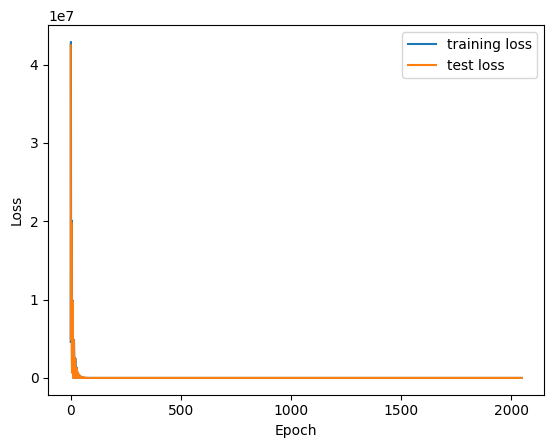

In [ ]:

# Train the model for a specified number of epochs
num_epochs = 2048
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Compute the model output
    y_pred = model(x_train).view(-1, 1)
    y_train = y_train.view(-1, 1)
    loss = loss_fn(y_pred, y_train)

    # Backpropagate the gradients
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Append the current training loss to the list
    train_loss.append(loss.item())

    # Evaluate the model on the test data
    y_test_pred = model(x_test).view(-1, 1)
    y_test = y_test.view(-1, 1)
    test_loss.append(loss_fn(y_test_pred, y_test).item())

# Plot the training and test loss
import matplotlib.pyplot as plt

plt.plot(train_loss, label='training loss')
plt.plot(test_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss') #use plty scale to visualize axis in terms of log 
plt.legend()
plt.show()

In [ ]:
def predict_weight(model, node1, node2):
    # Convert the node indices to tensors
    node1 = torch.tensor([node1], dtype=torch.float32)
    node2 = torch.tensor([node2], dtype=torch.float32)

    # Concatenate the node features to form a single input tensor
    x = torch.cat([node1, node2], dim=0)

    # Pass the input tensor through the model to get the predicted weight
    y_pred = model(x).item()

    return y_pred

# Example usage:
node1 = 4740 # Index of first node
node2 = 3527 # Index of second node
predicted_weight = predict_weight(model, node1, node2)
print("The predicted weight between nodes {} and {} is: {}".format(node1, node2, predicted_weight))


The predicted weight between nodes 4740 and 3527 is: 0.8712606430053711


In [ ]:
#test accuracy. study data set splitting, etc...

def calculate_accuracy(model, edge_index, edge_attr):
    # Convert the edge indices and edge attributes to tensors
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_attr = torch.tensor(edge_attr, dtype=torch.float32)

    # Get the predicted edge weights
    y_pred = model(edge_index, edge_attr).view(-1)

    # Compute the mean squared error loss
    mse_loss = nn.MSELoss()
    loss = mse_loss(y_pred, edge_attr)

    # Compute the accuracy as 1 - normalized MSE loss
    accuracy = 1 - (loss.item() / torch.mean(torch.pow(edge_attr - torch.mean(edge_attr), 2)))

    return accuracy 


In [ ]:
# Convert the graph data to a PyTorch Geometric `Data` object
data = Data(edge_index=edge_index, edge_attr=edge_weights)

# Split the data into training and test sets
train_data, test_data = random_split(data, [num_train_edges, num_test_edges])

# Create a PyTorch Geometric `DataLoader` object for the training data
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Create a PyTorch Geometric `DataLoader` object for the test data
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define the model architecture
model = MyGNN(num_features, hidden_channels, num_classes)

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model for the specified number of epochs
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Loop over the training batches
    for batch in train_loader:
        # Extract the batch data
        batch_edge_index, batch_edge_attr = batch.edge_index, batch.edge_attr

        # Zero the gradients
        optimizer.zero_grad()

        # Compute the model output
        y_pred = model(batch_edge_index, batch_edge_attr).view(-1)
        y_true = batch_edge_attr.view(-1)

        # Compute the loss
        loss = loss_fn(y_pred, y_true)

        # Backpropagate the gradients
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Set the model to evaluation mode
    model.eval()

    # Compute the accuracy on the test set
    with torch.no_grad():
        for batch in test_loader:
            batch_edge_index, batch_edge_attr = batch.edge_index, batch.edge_attr
            accuracy = calculate_accuracy(model, batch_edge_index, batch_edge_attr)

    # Print the current epoch and test accuracy
    print("Epoch {}, Test Accuracy: {:.4f}".format(epoch+1, accuracy))



NameError: ignored

Documentation for experimentation and error learning:


*You need to first detach the tensors and then convert them to numpy arrays before you can pass them to the roc_auc_score function. The error message is indicating that the tensors you are trying to pass contain gradient information and can't be converted to numpy arrays directly.*



In [ ]:
# Calculate accuracy

import torch
#from torch_geometric.data import DataLoader
from sklearn.metrics import mean_squared_error

# Create a DataLoader for the test data
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Set the model to evaluation mode
model.eval()

# Compute the mean squared error on the test data
mse = 0.0
num_samples = 0
with torch.no_grad():
    for data in test_loader:
        x, y = data.x.to(device), data.y.to(device)
        out = model(data)
        mse += mean_squared_error(y.cpu().numpy(), out.cpu().numpy())
        num_samples += 1

mse /= num_samples

print('MSE on test data: {:.4f}'.format(mse))




NameError: ignored

In [ ]:
#Jaccard similarity experimentation

In [ ]:
#Calculate Jaccard Similarity (not too relevant but yeah)

import networkx as nx

def jaccard_similarity(graph, node1, node2):
    neighbor_set1 = set(graph.neighbors(node1))
    neighbor_set2 = set(graph.neighbors(node2))
    similarity = len(neighbor_set1.intersection(neighbor_set2)) / len(neighbor_set1.union(neighbor_set2))
    return similarity

graph = nx.Graph()
for index, row in df.iterrows():
    Gene_1 = row['Gene 1']
    Gene_2 = row['Gene 2']
    Weight = row['Weight']
    Network_Group = row['Network group']

    graph.add_edge(Gene_1, Gene_2, Weight=Weight)

# Example usage:
nodea = "EZH2" #desired node
nodeb = "MSH3" #desired node
similarity = jaccard_similarity(graph, nodea, nodeb)
print("Jaccard Similarity between " + str(nodea) + " and " + str(nodeb) + " is " +  str(similarity))

#Jaccard Similarity measures how similar two data points are - study this more in-depth. 